# Classification

### Description

This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

## Key Features:

- **A_id**: Unique identifier for each fruit.
- **Size**: Size of the fruit.
- **Weight**: Weight of the fruit.
- **Sweetness**s: Degree of sweetness of the frui.
- **Crunchiness**ss: Texture indicating the crunchiness of the fru.
- **Juiciness**ess: Level of juiciness of the fr.
- **it
Ripe**ness: Stage of ripeness of the f.
- **uit
Ac**idity: Acidity level of the .
- **ruit
Q**uality: Overall quality of the. fruit

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./apple_quality.csv")

In [3]:
df.shape

(4001, 9)

In [4]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [7]:
df.dropna(inplace=True)

In [8]:
df["Acidity"] = df["Acidity"].astype("float64")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


`A_id` is not usefull for classification.

`Quality` is our output and we need to change good and bad to 0 and 1 respectively.

In [10]:
# np.where(df["Quality"]=="good", 0, 1) # from numpy
df["Quality"].replace(["good", "bad"], [0, 1], inplace=True)

In [11]:
df.drop("A_id", axis="columns", inplace=True)
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


## Visualization

before spliting and doing analysis on data
check for skewdness etc.

<Axes: ylabel='Frequency'>

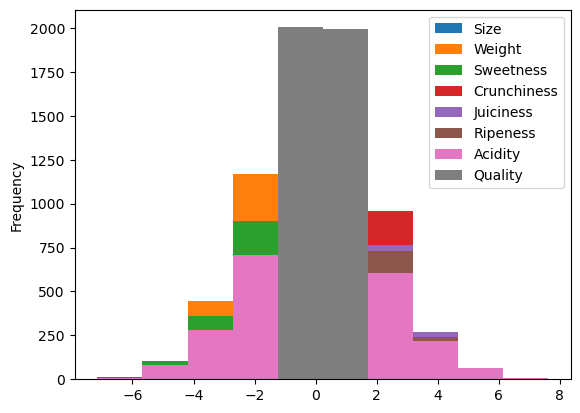

In [12]:
df.plot.hist()

## Creating Dataset

In [13]:
X = df.drop("Quality", axis="columns")
y = df["Quality"]

In [14]:
X.shape, y.shape

((4000, 7), (4000,))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [17]:
print(f"Train size is: {len(X_train)}, and Validation size is: {len(X_val)}")

Train size is: 3200, and Validation size is: 800


# Algorithm

there are various classification algorithms which I can apply here.

1. KNN
2. SVM
3. Random Forest
4. Naive Bayes
5. Logistic Regression
6. Gradient Boosting
7. Neural Network
8. LDA / QDA

and various others

### [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
neigh_prediction = neigh.predict(X_val)

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true=y_val, y_pred=neigh_prediction)
print(accuracy)

0.88875


## SVC

In [22]:
from sklearn.svm import SVC

In [23]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [24]:
svc_prediction = svc.predict(X_val)

In [25]:
print(accuracy_score(y_true=y_val, y_pred=svc_prediction))

0.88375


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(random_state=0)

In [28]:
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_val)
print(accuracy_score(y_true=y_val, y_pred=rfc_prediction))

0.8775


## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [30]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_val)
print(accuracy_score(y_true=y_val, y_pred=gnb_predict))

0.7475


## Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
gbc = GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_val)
print(accuracy_score(y_true=y_val, y_pred=gbc_predict))

0.8825


## Ada Boosting

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
abc = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200)
abc.fit(X_train, y_train)
abc_predict = abc.predict(X_val)
print(accuracy_score(y_true=y_val, y_pred=abc_predict))

0.87125


# ROC Curve

In [35]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

%matplotlib inline

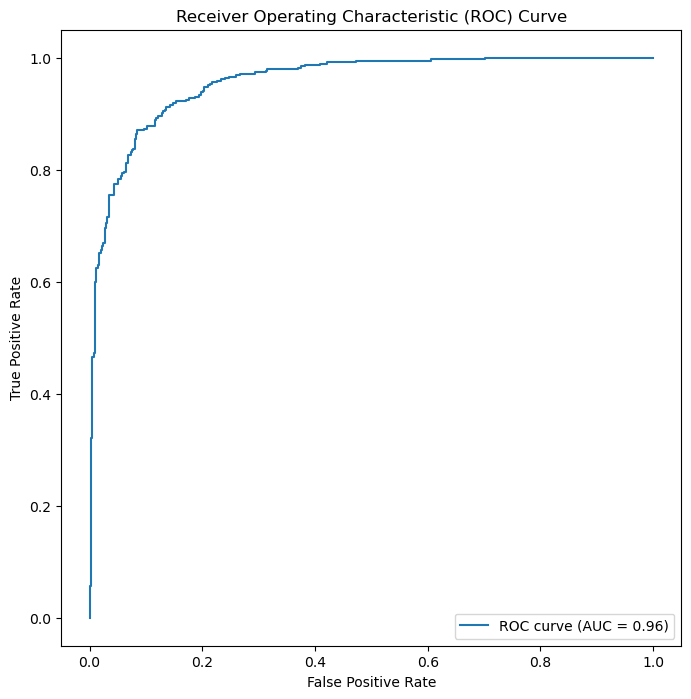

In [36]:
svc_proba = svc.decision_function(X_val)

fpr, tpr, thresholds = roc_curve(y_val, svc_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()